**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




In [ ]:
import numpy as np
import pandas as pd
from time import time
import warnings
from sklearn.metrics import homogeneity_score,f1_score,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [1]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:

Y_train,Y_test = trainy.reshape(-1,1) , testy.reshape(-1,1)
X_train = trainX.reshape(-1,784).astype(float)
X_test = testX.reshape(-1,784).astype(float)
X_train , X_test = X_train/255 , X_test/255
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test,axis=0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [ ]:
def cost(clusters,X,centroids):
  cost=0
  for i in clusters:
    cluster_points = X[clusters[i]]
    cost+=np.sum(np.square(euclid_distance(cluster_points, centroids[i])))
  return cost
def euclid_distance(p1,p2):
  return np.sqrt(np.sum(((p1-p2)**2),axis=1))

In [ ]:
#implement Kmeans from scratch
class Kmeans:

  def __init__(self,K=10):
    self.K = K
  
  def train(self, X,iterations):
    # set initial clusters
    self.X = X

    self.centroids =   X[np.random.choice(self.X.shape[0], self.K, replace=False)]
    for itr in range(iterations):
      # self.clusters = 
      self._update_clusters()
      x = self.centroids.copy()
      self._update_centroids()
      # print(euclid_distance(x,self.centroids))
      if(np.sum(euclid_distance(x,self.centroids))==0):
          print("converged") 
          break
      print(itr,end=" ")
  def train_man(self, X,iterations):
    # set initial clusters
      self.X = X

      self.centroids =   X[np.random.choice(self.X.shape[0], self.K, replace=False)]
      for itr in range(iterations):
        
        self._update_clusters_man()
        x = self.centroids.copy()
        self._update_centroids()
        
        if(np.sum(euclid_distance(x,self.centroids))==0):
            print("converged") 
            break
        print(itr,end=" ")
        # print(self.centroids[0,:5])
  def train_rp(self,X,iterations):
    self.X = X
    index_to_cluster = np.random.choice(range(0,self.K),replace=True,size=self.X.shape[0])
    self.clusters = {}
    for i in range(len(self.X)):
      if(index_to_cluster[i] in  self.clusters): self.clusters[index_to_cluster[i]]+=[i]
      else: self.clusters[index_to_cluster[i]] = [i]

    self.centroids =   X[np.random.choice(self.X.shape[0], self.K, replace=False)]
    for itr in range(iterations):
      # self.clusters = 
      x = self.centroids.copy()
      self._update_centroids()
      self._update_clusters()
      
      
      # print(euclid_distance(x,self.centroids))
      if(np.sum(euclid_distance(x,self.centroids))==0):
          print("converged") 
          break
      print(itr,end=" ")

  def _update_centroids(self):
    i=0
    for cluster in self.clusters:
      # print(np.mean(self.X[self.clusters[cluster]],axis=0).shape)
      self.centroids[i] =  np.mean(self.X[self.clusters[cluster]],axis=0)
      # print(self.centroids[i].shape)
      i+=1

  def _update_clusters(self):
    self.clusters = {}
    distance_vector = np.sqrt( np.multiply(-2,np.matmul(self.X,self.centroids.T)) + np.sum(self.X**2,axis=1).reshape(-1,1) + np.sum(self.centroids**2,axis=1) )
    for i in range(len(self.X)):
      index = distance_vector[i].argmin()
      if(index in  self.clusters): self.clusters[index]+=[i]
      else: self.clusters[index] = [i]


  
  def _update_clusters_man(self):
    self.clusters = {}
    distance_vector = np.abs(self.X[:,None]-self.centroids).sum(-1)
    for i in range(len(self.X)):
      index = distance_vector[i].argmin()
      if(index in  self.clusters): self.clusters[index]+=[i]
      else: self.clusters[index] = [i]
  
  def predict(self,X_test, Y_test):
    pred_y = np.zeros(Y_test.shape)
    distance_vector = np.sqrt( np.multiply(-2,np.matmul(X_test,self.centroids.T)) + np.sum(X_test**2,axis=1).reshape(-1,1) + np.sum(self.centroids**2,axis=1) )
    for i in range(len(X_test)):
      index = distance_vector[i].argmin()
      pred_y[i] = [index]
    return pred_y

  def map_cluster_to_class(self,Y_train):
    self.cluster_to_class = {}
    for c  in kmc.clusters:
      self.cluster_to_class[c] = np.bincount(Y_train[kmc.clusters[c]].reshape(len(kmc.clusters[c]))).argmax()
    return self.cluster_to_class
  
  def predict_class(self,Y_train, pred_cluster):
    self.cluster_to_class = self.map_cluster_to_class(Y_train)
    pred_class = []
    for i in pred_cluster:
      pred_class += [self.cluster_to_class[i[0]]]
    return pred_class
# kmc = Kmeans(11)
# kmc.train_rp(X_train,1000)

In [ ]:
def silhouette(kmc):

  s=0
#   print("finding closest clusters")
  
  closest_clusters = find_closest_cluster(kmc.centroids)
#   print("found closest clusters")
  for i in range(len(kmc.centroids)):
    
    current_cluster = X_train[kmc.clusters[i]]
#     print("current_cluster", current_cluster.shape)
#     print("finding d1")
    d1 = distance_vec(current_cluster,current_cluster)
    np.fill_diagonal(d1,0)
#     print("d1 found")
    d1 = (np.sum(d1,axis=1)/(current_cluster.shape[0]-1))
    closest_cluster = X_train[kmc.clusters[closest_clusters[i]]]
#     print("closest cluster",closest_cluster.shape)
#     print("finding d2")
    d2 = distance_vec(current_cluster,closest_cluster)
    
    d2 = (np.mean(d2,axis=1))
#     print(d1.shape,d2.shape)
    ab = np.append(d1.reshape(-1,1),d2.reshape(-1,1),axis=1)
    
    max_ab = np.max(ab,axis=1)
#     print(max_ab[:5])
    ab = np.divide(d2-d1,max_ab)
    s += np.mean(ab)
#     print(np.mean(ab))
#   print(ab.shape)
#   print(ab[:5])
#   print(max_ab.shape)
  return(s/kmc.K)
def distance_vec(A,B):
  AB_2 = np.multiply(-2,np.matmul(A,B.T))
  A2 = np.sum(A**2,axis=1).reshape(-1,1)
  B2 = np.sum(B**2,axis=1)
  distance_vector = np.sqrt( AB_2 +A2  +B2  )
  return distance_vector
def find_closest_cluster(centroid):
  distance_vector = distance_vec(centroid,centroid)
  np.fill_diagonal(distance_vector,np.inf)
  return np.argmin(distance_vector,axis=1)


In [ ]:
cost_matrix = []
for k in range(1,20):
  print("\n FOR K =",k)
  print("Iterations",end=" ")
  kmc = Kmeans(k)
  kmc.train(X_train,500)
  cost_matrix+=[cost(kmc.clusters,X_train,kmc.centroids)]
  print("COST", cost(kmc.clusters,X_train,kmc.centroids))


 FOR K = 1
Iterations 0 converged
COST 9092919.081766577

 FOR K = 2
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 converged
COST 5936372.249411359

 FOR K = 3
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 converged
COST 4755965.403334811

 FOR K = 4
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 converged
COST 3739265.464309896

 FOR K = 5
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 converged
COST 3369625.466005683

 FOR K = 6
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 converged
COST 2998169.763843672

 FOR K = 7
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 converged
COST 2746037.549229207

 FOR K = 8
Iteration

In [ ]:
silhoute_matrix = []
for k in range(4,25):
  print("\n FOR K=",k)
  print("Iterations",end=" ")
  kmc = Kmeans(k)
  kmc.train(X_train,500)
  x = silhouette(kmc)
  silhoute_matrix += [x]
  print("Silhouete Score ", x)


 FOR K= 4
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 converged
Silhouete Score  0.2078246166384518

 FOR K= 5
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 converged
Silhouete Score  0.1742625050582263

 FOR K= 6
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 converged
Silhouete Score  0.17243302913379607

 FOR K= 7
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 converged
Silhouete Score  0.20608933152356324

 FOR K= 8
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 converged
Silhouete Score  0.17956200359929295

 FOR K= 9
Iterations 0 1 2 3 4 5 6 7 

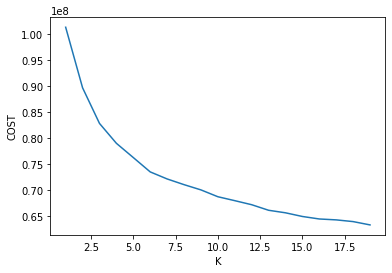

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),cost_matrix)
plt.xlabel("K")
plt.ylabel("COST")
plt.show()

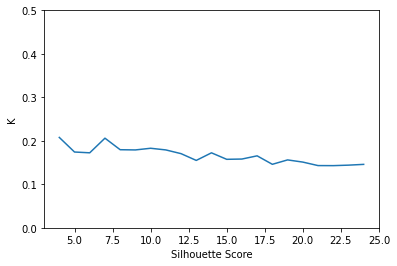

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(4,25),silhoute_matrix)
plt.ylim(0,0.5)
plt.xlabel("Silhouette Score")
plt.ylabel("K")
plt.show()

From the above graphs we can see that  at **k =7** we have the maximum silhouette score and also in the elbow curve we can see that the elbow start at **k=7**

In [ ]:
kmc = Kmeans(7)

kmc.train(X_train,1000)
output_euclid_train = kmc.predict(X_train,Y_train)


kmc.train_man(X_train,1000)
output_man_train = kmc.predict(X_train,Y_train)


kmc.train_rp(X_train,1000)
output_rp_train = kmc.predict(X_train,Y_train)

kmc.train(X_train,1000)
output_euclid_test = kmc.predict(X_test,Y_test)
output_euclid_test_class = kmc.predict_class(Y_train,output_euclid_test)

kmc.train_man(X_train,1000)
output_man_test = kmc.predict(X_test,Y_test)
output_man_test_class = kmc.predict_class(Y_train,output_man_test)


kmc.train_rp(X_train,1000)
output_rp_test = kmc.predict(X_test,Y_test)
output_rp_test_class = kmc.predict_class(Y_train,output_rp_test)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 converged


In [ ]:
from sklearn.metrics import homogeneity_score
print("Metric Used: Homogenity Score")

print("TRAINING SET")
print("----------------------------------------------------")
print("Euclid\t\t \t\t\tManhattan")
EUCLID = homogeneity_score(output_euclid_train.flatten(),Y_train.flatten())
MANHATTAN = homogeneity_score(output_man_train.flatten(),Y_train.flatten())
print(EUCLID,"\t\t",MANHATTAN)
print("----------------------------------------------------")
print("Forgy \t\t\t\tRandom Partition")
FORGY = homogeneity_score(output_euclid_train.flatten(),Y_train.flatten())
RP = homogeneity_score(output_rp_train.flatten(),Y_train.flatten())
print(FORGY,"\t\t",RP)


print("\nTEST SET")
print("----------------------------------------------------")
print("Euclid\t\t \t\t\tManhattan")
EUCLID = homogeneity_score(output_euclid_test.flatten(),Y_test.flatten())
MANHATTAN = homogeneity_score(output_man_test.flatten(),Y_test.flatten())
print(EUCLID,"\t\t",MANHATTAN)
print("----------------------------------------------------")
print("Forgy \t\t\t\tRandom Partition")
FORGY = homogeneity_score(output_euclid_test.flatten(),Y_test.flatten())
RP = homogeneity_score(output_rp_test.flatten(),Y_test.flatten())
print(FORGY,"\t\t",RP)


Metric Used: Homogenity Score
TRAINING SET
----------------------------------------------------
Euclid		 			Manhattan
0.5534417600345294 		 0.5895324580374085
----------------------------------------------------
Forgy 				Random Partition
0.5534417600345294 		 0.5535602821357806

TEST SET
----------------------------------------------------
Euclid		 			Manhattan
0.5495994467423116 		 0.505881786640634
----------------------------------------------------
Forgy 				Random Partition
0.5495994467423116 		 0.5306873653243623


In [ ]:
print("====================================================")
print("On the basis of distance measure")
print("====================================================")

print("1. EUCLID")

print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_euclid_test_class,Y_test))
print("====================================================")
print("2. MANHATTAN")



print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_man_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_man_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_man_test_class,Y_test))

print("====================================================")
print("On the basis of initialisation")
print("====================================================")

print("1. FORGY")


print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_euclid_test_class,Y_test))
print("====================================================")
print("2. RANDOM PARTITION")

print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_rp_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_rp_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_rp_test_class,Y_test))


On the basis of distance measure
1. EUCLID
----------------------------------------------------
Accuracy Score:  0.5018095238095238
----------------------------------------------------
Confusion Matrix:
 [[1266   85   55  620  323    0  441    0   29    7]
 [  70 1921    6 1099   60    1   24    0    5    0]
 [  64   27 1308   28 1366    0  790    0   99    4]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 662  107  664  411  319  432  830    2  371   50]
 [   3    0    1    0    0 1400    7 1935  167  165]
 [  26    1   28    3   18    6   43    1 1430    1]
 [   1    0    0    0    0  199    1  165    5 1848]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.45      0.51      2826
           1       0.90      0.60      0.72      3186
           2       0.63  

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7)
kmeans.fit(X_train)
sklearn_kmean = kmeans.predict(X_test)
print("Homogenity Score using Sklearn",homogeneity_score(sklearn_kmean.flatten(),Y_test.flatten()))

Homogenity Score using Sklearn 0.5769247502283322


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
train_tsne = tsne.fit_transform(X_train)

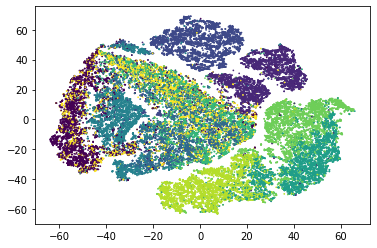

In [ ]:
plt.scatter(train_tsne1[:,0], train_tsne1[:,1], c=Y_train ,s = 0.5)
plt.show()

# Kmean++

In [ ]:

class Kmeansplusplus:


  def __init__(self,K=10):
    self.K = K
  
  def initialise_centroids(self):
    self.centroids =  self.X[np.random.choice(self.X.shape[0], 1, replace=False)]
   
    for i in range(self.K-1):
      distance_vector = np.sqrt( np.multiply(-2,np.matmul(self.X,self.centroids.T)) + np.sum(self.X**2,axis=1).reshape(-1,1) + np.sum(self.centroids**2,axis=1) )

      distance_vector = np.min(distance_vector,axis=1)
      probability_density = distance_vector/np.nansum(distance_vector)
      probability_density = np.nan_to_num(probability_density,nan=0)
      
      cn = self.X[np.random.choice(range(self.X.shape[0]), replace=False,p=probability_density.flatten())].reshape(-1,1).T
      
      self.centroids =np.append(self.centroids,  cn,axis=0)


  def train(self, X,iterations):
    # set initial clusters
    self.X = X

    self.initialise_centroids()
    for itr in range(iterations):
      # self.clusters = 
      self._update_clusters()
      x = self.centroids.copy()
      self._update_centroids()
      # print(euclid_distance(x,self.centroids))
      if(np.sum(euclid_distance(x,self.centroids))==0):
          print("converged") 
          break
      print(itr,end=" ")
      # print(self.centroids[0,:5])
  
  def train_man(self, X,iterations):
    # set initial clusters
    self.X = X

    self.initialise_centroids()
    for itr in range(iterations):
      # self.clusters = 
      self._update_clusters_man()
      x = self.centroids.copy()
      self._update_centroids()
      # print(euclid_distance(x,self.centroids))
      if(np.sum(euclid_distance(x,self.centroids))==0):
          print("converged") 
          break
      print(itr,end=" ")
      # print(self.centroids[0,:5])
  
  def _update_centroids(self):
    i=0
    for cluster in self.clusters:
      # print(np.mean(self.X[self.clusters[cluster]],axis=0).shape)
      self.centroids[i] =  np.mean(self.X[self.clusters[cluster]],axis=0)
      # print(self.centroids[i].shape)
      i+=1

  def _update_clusters(self):
    self.clusters = {}
    distance_vector = np.sqrt( np.multiply(-2,np.matmul(self.X,self.centroids.T)) + np.sum(self.X**2,axis=1).reshape(-1,1) + np.sum(self.centroids**2,axis=1) )
    for i in range(len(self.X)):
      index = distance_vector[i].argmin()
      if(index in  self.clusters): self.clusters[index]+=[i]
      else: self.clusters[index] = [i]
  
  def _update_clusters_man(self):
    self.clusters = {}
    distance_vector = np.abs(self.X[:,None]-self.centroids).sum(-1)
    for i in range(len(self.X)):
      index = distance_vector[i].argmin()
      if(index in  self.clusters): self.clusters[index]+=[i]
      else: self.clusters[index] = [i]
  def predict(self,X_test, Y_test):
    pred_y = np.zeros(Y_test.shape)
    distance_vector = np.sqrt( np.multiply(-2,np.matmul(X_test,self.centroids.T)) + np.sum(X_test**2,axis=1).reshape(-1,1) + np.sum(self.centroids**2,axis=1) )
    for i in range(len(X_test)):
      index = distance_vector[i].argmin()
      pred_y[i] = [index]
    return pred_y

  def map_cluster_to_class(self,Y_train):
    self.cluster_to_class = {}
    for c  in kmc.clusters:
      self.cluster_to_class[c] = np.bincount(Y_train[kmc.clusters[c]].reshape(len(kmc.clusters[c]))).argmax()
    return self.cluster_to_class
  
  def predict_class(self,Y_train, pred_cluster):
    self.cluster_to_class = self.map_cluster_to_class(Y_train)
    pred_class = []
    for i in pred_cluster:
      pred_class += [self.cluster_to_class[i[0]]]
    return pred_class
  




In [ ]:
cost_matrix = []
for k in range(1,20):
  print("\n FOR K =",k)
  print("Iterations",end=" ")
  kmc = Kmeansplusplus(k)
  kmc.train(X_train,500)
  cost_matrix+=[cost(kmc.clusters,X_train,kmc.centroids)]
  print("COST", cost(kmc.clusters,X_train,kmc.centroids))


 FOR K = 1
Iterations 0 converged
COST 3342431.669851242

 FOR K = 2
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 converged
COST 2635412.158693957

 FOR K = 3
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 converged
COST 2258720.0957762115

 FOR K = 4
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 converged
COST 2047875.5176117527

 FOR K = 5
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 converged
COST 1922285.8676922936

 FOR K = 6
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 converged
COST 1799831.7999897595

 FOR K = 7
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 converge

In [ ]:
silhoute_matrix = []
for k in range(4,25):
  print("\n FOR K=",k)
  print("Iterations",end=" ")
  kmc = Kmeansplusplus(k)
  kmc.train(X_train,500)
  x = silhouette(kmc)
  silhoute_matrix += [x]
  print("Silhouete Score ", x)


 FOR K= 4
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 converged
Silhouete Score  0.20797143617034863

 FOR K= 5
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 converged
Silhouete Score  0.18525450230521118

 FOR K= 6
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 converged
Silhouete Score  0.19063425259655356

 FOR K= 7
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 converged
Silhouete Score  0.20568729934385185

 FOR K= 8
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69

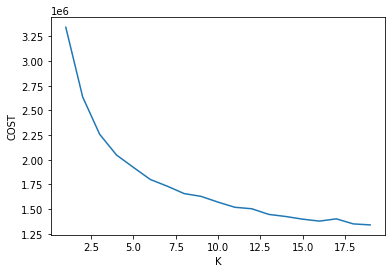

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),cost_matrix)
plt.xlabel("K")
plt.ylabel("COST")
plt.show()

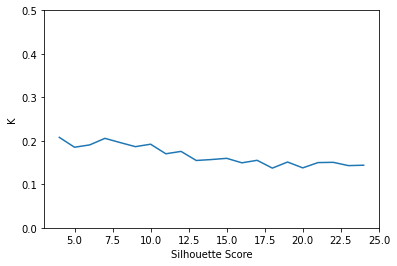

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(4,25),silhoute_matrix)
plt.ylim(0,0.5)
plt.xlabel("Silhouette Score")
plt.ylabel("K")
plt.show()

In [ ]:
kmc = Kmeansplusplus(7)

kmc.train(X_train,1000)
output_euclid_train = kmc.predict(X_train,Y_train)


kmc.train_man(X_train,1000)
output_man_train = kmc.predict(X_train,Y_train)



kmc.train(X_train,1000)
output_euclid_test = kmc.predict(X_test,Y_test)
output_euclid_test_class = kmc.predict_class(Y_train,output_euclid_test)

kmc.train_man(X_train,1000)
output_man_test = kmc.predict(X_test,Y_test)
output_man_test_class = kmc.predict_class(Y_train,output_man_test)




0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 converged


In [ ]:
from sklearn.metrics import homogeneity_score
print("Metric Used: Homogenity Score")

print("TRAINING SET")
print("----------------------------------------------------")
print("Euclid\t\t \t\t\tManhattan")
EUCLID = homogeneity_score(output_euclid_train.flatten(),Y_train.flatten())
MANHATTAN = homogeneity_score(output_man_train.flatten(),Y_train.flatten())
print(EUCLID,"\t\t",MANHATTAN)


print("\nTEST SET")
print("----------------------------------------------------")
print("Euclid\t\t \t\t\tManhattan")
EUCLID = homogeneity_score(output_euclid_test.flatten(),Y_test.flatten())
MANHATTAN = homogeneity_score(output_man_test.flatten(),Y_test.flatten())
print(EUCLID,"\t\t",MANHATTAN)



Metric Used: Homogenity Score
TRAINING SET
----------------------------------------------------
Euclid		 			Manhattan
0.5349047686965671 		 0.5895058462914529

TEST SET
----------------------------------------------------
Euclid		 			Manhattan
0.531730486289379 		 0.5862097075543788


In [ ]:
print("====================================================")
print("On the basis of distance measure")
print("====================================================")

print("1. EUCLID")

print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_euclid_test_class,Y_test))
print("====================================================")
print("2. MANHATTAN")



print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_man_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_man_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_man_test_class,Y_test))



On the basis of distance measure
1. EUCLID
----------------------------------------------------
Accuracy Score:  0.432
----------------------------------------------------
Confusion Matrix:
 [[1246   83   52  618  322    0  430    0   21    1]
 [  67 1937    7 1097   60    1   21    0    5    0]
 [  82   28 1326   31 1364    1  813    0  527    3]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 688   93  673  415  335  260  853    2  557   40]
 [   3    0    1    0    1 1544    6 1794  118  115]
 [   0    0    0    0    0    0    0    0    0    0]
 [   6    0    3    0    4  232   13  307  878 1916]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.45      0.51      2773
           1       0.90      0.61      0.73      3195
           2       0.64      0.32     

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7,init="k-means++")
kmeans.fit(X_train)
sklearn_kmean = kmeans.predict(X_test)
print("Homogenity Score using Sklearn",homogeneity_score(sklearn_kmean.flatten(),Y_test.flatten()))

Homogenity Score using Sklearn 0.5769247502283321


In [ ]:
from sklearn.manifold import TSNE
tsne1 = TSNE(n_components=2)
train_tsne1 = tsne1.fit_transform(X_train)

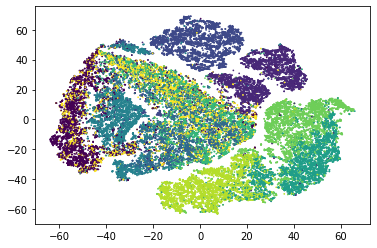

In [ ]:
plt.scatter(train_tsne1[:,0], train_tsne1[:,1], c=Y_train ,s = 0.5)
plt.show()

## Part 2

In [ ]:
data = pd.read_csv("./data.csv",header=None)


In [ ]:
data[0] =  data[0].str.lstrip('[')
data[191] =  data[191].str.rstrip(']')
X = data.iloc[:,:192]
Y = data[192]

In [ ]:
mapDic = {' T-Shirt':0,' Bag':1,' Trouser':2,' Coat':3,' Dress':4,' Sneaker':5,' Pullover':6,' Sandal':7,' Ankle Boot':8,' Shirt':9}
Y = np.array([mapDic[i] for i in Y]).reshape(-1,1)
# Y[:10]

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.3)
X_train  = X_train.to_numpy().astype(float)
X_test  = X_test.to_numpy().astype(float)


In [ ]:
cost_matrix = []
for k in range(1,20):
  print("\n FOR K =",k)
  print("Iterations",end=" ")
  kmc = Kmeans(k)
  kmc.train(X_train,500)
  cost_matrix+=[cost(kmc.clusters,X_train,kmc.centroids)]
  print("COST", cost(kmc.clusters,X_train,kmc.centroids))


 FOR K = 1
Iterations 0 converged
COST 9101277.191577435

 FOR K = 2
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 converged
COST 5933061.458476957

 FOR K = 3
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 converged
COST 4752881.1270307675

 FOR K = 4
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 converged
COST 3735602.462381109

 FOR K = 5
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 converged
COST 3367481.367633457

 FOR K = 6
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 converged
COST 2996712.5457843402

 FOR K = 7
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 converged
COST 2889853.2019851794

 FOR K = 8
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44

In [ ]:
silhoute_matrix = []
for k in range(4,25):
  print("\n FOR K=",k)
  print("Iterations",end=" ")
  kmc = Kmeans(k)
  kmc.train(X_train,500)
  x = silhouette(kmc)
  silhoute_matrix += [x]
  print("Silhouete Score ", x)


 FOR K= 4
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 converged
Silhouete Score  0.34233293225557715

 FOR K= 5
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 converged
Silhouete Score  0.3101765807392313

 FOR K= 6
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 converged
Silhouete Score  0.3397099918097342

 FOR K= 7
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 converged
Silhouete Score  0.3009976769014262

 FOR K= 8
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 converged
Silhouete Score  0.32468502092417517

 FOR K= 9
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

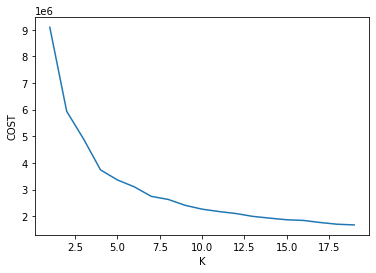

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),cost_matrix)
plt.xlabel("K")
plt.ylabel("COST")
plt.show()

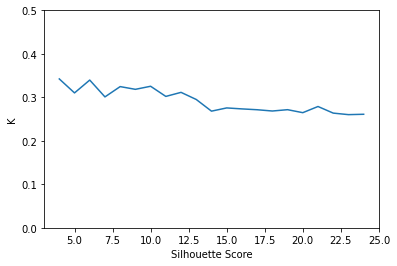

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(4,25),silhoute_matrix)
plt.ylim(0,0.5)
plt.xlabel("Silhouette Score")
plt.ylabel("K")
plt.show()

From the above graphs we can see that  at **k =7** we have the maximum silhouette score and also in the elbow curve we can see that the elbow start at **k=7**

In [ ]:
kmc = Kmeans(7)

kmc.train(X_train,1000)
output_euclid_train = kmc.predict(X_train,Y_train)


kmc.train_man(X_train,1000)
output_man_train = kmc.predict(X_train,Y_train)


kmc.train_rp(X_train,1000)
output_rp_train = kmc.predict(X_train,Y_train)

kmc.train(X_train,1000)
output_euclid_test = kmc.predict(X_test,Y_test)
output_euclid_test_class = kmc.predict_class(Y_train,output_euclid_test)

kmc.train_man(X_train,1000)
output_man_test = kmc.predict(X_test,Y_test)
output_man_test_class = kmc.predict_class(Y_train,output_man_test)


kmc.train_rp(X_train,1000)
output_rp_test = kmc.predict(X_test,Y_test)
output_rp_test_class = kmc.predict_class(Y_train,output_rp_test)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 3

In [ ]:
from sklearn.metrics import homogeneity_score
print("Metric Used: Homogenity Score")

print("TRAINING SET")
print("----------------------------------------------------")
print("Euclid\t\t \t\t\tManhattan")
EUCLID = homogeneity_score(output_euclid_train.flatten(),Y_train.flatten())
MANHATTAN = homogeneity_score(output_man_train.flatten(),Y_train.flatten())
print(EUCLID,"\t\t",MANHATTAN)
print("----------------------------------------------------")
print("Forgy \t\t\t\tRandom Partition")
FORGY = homogeneity_score(output_euclid_train.flatten(),Y_train.flatten())
RP = homogeneity_score(output_rp_train.flatten(),Y_train.flatten())
print(FORGY,"\t\t",RP)


print("\nTEST SET")
print("----------------------------------------------------")
print("Euclid\t\t \t\t\tManhattan")
EUCLID = homogeneity_score(output_euclid_test.flatten(),Y_test.flatten())
MANHATTAN = homogeneity_score(output_man_test.flatten(),Y_test.flatten())
print(EUCLID,"\t\t",MANHATTAN)
print("----------------------------------------------------")
print("Forgy \t\t\t\tRandom Partition")
FORGY = homogeneity_score(output_euclid_test.flatten(),Y_test.flatten())
RP = homogeneity_score(output_rp_test.flatten(),Y_test.flatten())
print(FORGY,"\t\t",RP)


Metric Used: Homogenity Score
TRAINING SET
----------------------------------------------------
Euclid		 			Manhattan
0.4830406143497074 		 0.47899127258771773
----------------------------------------------------
Forgy 				Random Partition
0.4830406143497074 		 0.5211159231617903

TEST SET
----------------------------------------------------
Euclid		 			Manhattan
0.5195600955288223 		 0.5218257604226496
----------------------------------------------------
Forgy 				Random Partition
0.5195600955288223 		 0.5194399807433094


In [ ]:
print("====================================================")
print("On the basis of distance measure")
print("====================================================")

print("1. EUCLID")

print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_euclid_test_class,Y_test))
print("====================================================")
print("2. MANHATTAN")



print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_man_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_man_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_man_test_class,Y_test))

print("====================================================")
print("On the basis of initialisation")
print("====================================================")

print("1. FORGY")


print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_euclid_test_class,Y_test))
print("====================================================")
print("2. RANDOM PARTITION")

print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_rp_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_rp_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_rp_test_class,Y_test))


On the basis of distance measure
1. EUCLID
----------------------------------------------------
Accuracy Score:  0.4907222222222222
----------------------------------------------------
Confusion Matrix:
 [[   0    0    0    0    0    0    0    0    0    0]
 [  14 1194    0    7    7    8   22   10    5   10]
 [ 100   12 1561   45 1056    0    7    5    3   35]
 [ 783  119   47 1233  328    0  958    0    0  778]
 [   0    0    0    0    0    0    0    0    0    0]
 [   2   52    0    0    0 1420    1  503  147    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 282  181  139  116  220  221  237 1204   82  354]
 [   0    3    0    0    1  151    0  101 1581    0]
 [ 644  238   46  331  191    0  556    6    3  640]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.66      0.94      0.78      1277
           2       0.87  

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7)
kmeans.fit(X_train)
sklearn_kmean = kmeans.predict(X_test)
print("Homogenity Score using Sklearn",homogeneity_score(sklearn_kmean.flatten(),Y_test.flatten()))

Homogenity Score using Sklearn 0.4821815390859758


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
train_tsne = tsne.fit_transform(X_train)

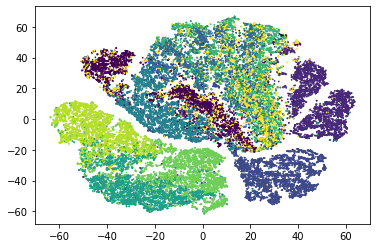

In [ ]:
plt.scatter(train_tsne[:,0], train_tsne[:,1], c=Y_train ,s = 0.5)
plt.show()

# Kmean++

In [ ]:
cost_matrix = []
for k in range(1,20):
  print("\n FOR K =",k)
  print("Iterations",end=" ")
  kmc = Kmeansplusplus(k)
  kmc.train(X_train,500)
  cost_matrix+=[cost(kmc.clusters,X_train,kmc.centroids)]
  print("COST", cost(kmc.clusters,X_train,kmc.centroids))


 FOR K = 1
Iterations 0 converged
COST 9092919.081766577

 FOR K = 2
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 converged
COST 5936372.249411359

 FOR K = 3
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 converged
COST 4896735.051248598

 FOR K = 4
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 converged
COST 3739266.586770248

 FOR K = 5
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 converged
COST 3361880.7842250625

 FOR K = 6
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 converged
COST 3102293.6745152054

 FOR K = 7
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 converged
COST 2746036.651985882

 FOR K = 8
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 

In [ ]:
silhoute_matrix = []
for k in range(4,25):
  print("\n FOR K=",k)
  print("Iterations",end=" ")
  kmc = Kmeansplusplus(k)
  kmc.train(X_train,500)
  x = silhouette(kmc)
  silhoute_matrix += [x]
  print("Silhouete Score ", x)


 FOR K= 4
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 converged
Silhouete Score  0.3423527158930084

 FOR K= 5
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 converged
Silhouete Score  0.32994585944179133

 FOR K= 6
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 converged
Silhouete Score  0.3397980273302394

 FOR K= 7
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 converged
Silhouete Score  0.33139899419698043

 FOR K= 8
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 converged
Silhouete Score  0.3245613077404667

 FOR K= 9
Iterations 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 con

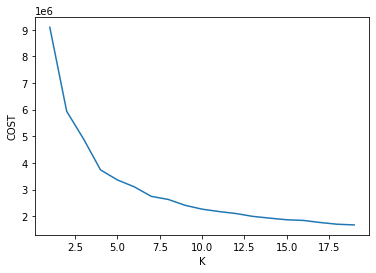

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,20),cost_matrix)
plt.xlabel("K")
plt.ylabel("COST")
plt.show()

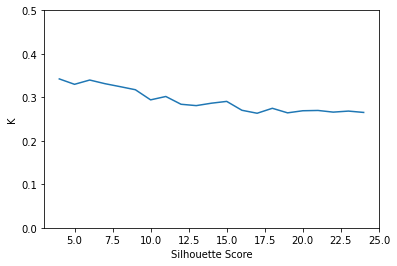

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(4,25),silhoute_matrix)
plt.ylim(0,0.5)
plt.xlabel("Silhouette Score")
plt.ylabel("K")
plt.show()

In [ ]:
kmc = Kmeansplusplus(7)

kmc.train(X_train,1000)
output_euclid_train = kmc.predict(X_train,Y_train)


kmc.train_man(X_train,1000)
output_man_train = kmc.predict(X_train,Y_train)



kmc.train(X_train,1000)
output_euclid_test = kmc.predict(X_test,Y_test)
output_euclid_test_class = kmc.predict_class(Y_train,output_euclid_test)

kmc.train_man(X_train,1000)
output_man_test = kmc.predict(X_test,Y_test)
output_man_test_class = kmc.predict_class(Y_train,output_man_test)




0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 converged
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 converged


In [ ]:
from sklearn.metrics import homogeneity_score
print("Metric Used: Homogenity Score")

print("TRAINING SET")
print("----------------------------------------------------")
print("Euclid\t\t \t\t\tManhattan")
EUCLID = homogeneity_score(output_euclid_train.flatten(),Y_train.flatten())
MANHATTAN = homogeneity_score(output_man_train.flatten(),Y_train.flatten())
print(EUCLID,"\t\t",MANHATTAN)


print("\nTEST SET")
print("----------------------------------------------------")
print("Euclid\t\t \t\t\tManhattan")
EUCLID = homogeneity_score(output_euclid_test.flatten(),Y_test.flatten())
MANHATTAN = homogeneity_score(output_man_test.flatten(),Y_test.flatten())
print(EUCLID,"\t\t",MANHATTAN)



Metric Used: Homogenity Score
TRAINING SET
----------------------------------------------------
Euclid		 			Manhattan
0.5349047686965671 		 0.5895058462914529

TEST SET
----------------------------------------------------
Euclid		 			Manhattan
0.531730486289379 		 0.5862097075543788


In [ ]:
print("====================================================")
print("On the basis of distance measure")
print("====================================================")

print("1. EUCLID")

print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_euclid_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_euclid_test_class,Y_test))
print("====================================================")
print("2. MANHATTAN")



print("----------------------------------------------------\nAccuracy Score: ", accuracy_score(output_man_test_class,Y_test))
print("----------------------------------------------------\nConfusion Matrix:\n", confusion_matrix(output_man_test_class,Y_test))
print("----------------------------------------------------\nClassification Report:\n",classification_report(output_man_test_class,Y_test))



On the basis of distance measure
1. EUCLID
----------------------------------------------------
Accuracy Score:  0.432
----------------------------------------------------
Confusion Matrix:
 [[1246   83   52  618  322    0  430    0   21    1]
 [  67 1937    7 1097   60    1   21    0    5    0]
 [  82   28 1326   31 1364    1  813    0  527    3]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 688   93  673  415  335  260  853    2  557   40]
 [   3    0    1    0    1 1544    6 1794  118  115]
 [   0    0    0    0    0    0    0    0    0    0]
 [   6    0    3    0    4  232   13  307  878 1916]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.45      0.51      2773
           1       0.90      0.61      0.73      3195
           2       0.64      0.32     

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7)
kmeans.fit(X_train)
sklearn_kmean = kmeans.predict(X_test)
print("Homogenity Score using Sklearn",homogeneity_score(sklearn_kmean.flatten(),Y_test.flatten()))

Homogenity Score using Sklearn 0.4833184544445708


In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
train_tsne = tsne.fit_transform(X_train)

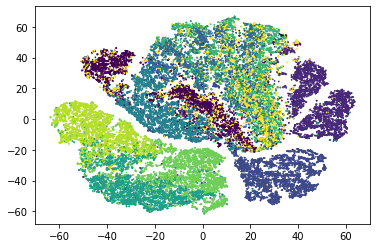

In [ ]:
plt.scatter(train_tsne[:,0], train_tsne[:,1], c=Y_train ,s = 0.5)
plt.show()

**The data after latent space representation is with reduced dimensionality thus reducing the time taken for prediction. The accuracy is quite close with the part1**